In [0]:
import pandas as pd

df = pd.read_csv('/content/drive/My Drive/one_journey.csv')
df.columns

Index(['_id', 'Timestamp', 'Type_of_mobile', 'MMSI', 'Latitude', 'Longitude',
       'Navigational_status', 'ROT', 'COG', 'Heading', 'IMO', 'Callsign',
       'Name', 'Ship_type', 'Cargo_type', 'Width', 'Length',
       'Type_of_position_fixing_device', 'Draught', 'Destination', 'ETA',
       'Data_source_type', 'Size_A', 'Size_B', 'Size_C', 'Size_D'],
      dtype='object')

In [0]:
df.head()

,_id,Timestamp,Type_of_mobile,MMSI,Latitude,Longitude,Navigational_status,ROT,COG,Heading,IMO,Callsign,Name,Ship_type,Cargo_type,Width,Length,Type_of_position_fixing_device,Draught,Destination,ETA,Data_source_type,Size_A,Size_B,Size_C,Size_D
0,ObjectId(5e8c49d16ba65308bf48a86e),2018-11-06T13:38:02.000Z,Class A,209336000,56.145188,10.221828,Under way using engine,0.0,331.7,216,9128403,5BAZ5,RIX ALLIANCE,Cargo,No additional information,11.0,88.0,GPS,3.2,FREDERIKSHAVN DK,07/11/2018 20:00:00,AIS,75.0,13.0,5.0,6.0
1,ObjectId(5e8c49d16ba65308bf48aad5),2018-11-06T13:38:06.000Z,Class A,209336000,56.145113,10.221905,Under way using engine,0.0,332.3,216,9128403,5BAZ5,RIX ALLIANCE,Cargo,No additional information,11.0,88.0,GPS,3.2,FREDERIKSHAVN DK,07/11/2018 20:00:00,AIS,75.0,13.0,5.0,6.0
2,ObjectId(5e8c49d16ba65308bf48b0a2),2018-11-06T13:38:16.000Z,Class A,209336000,56.145057,10.221943,Under way using engine,0.0,334.0,216,9128403,5BAZ5,RIX ALLIANCE,Cargo,No additional information,11.0,88.0,GPS,3.2,FREDERIKSHAVN DK,07/11/2018 20:00:00,AIS,75.0,13.0,5.0,6.0
3,ObjectId(5e8c49d16ba65308bf48b71a),2018-11-06T13:38:27.000Z,Class A,209336000,56.145035,10.221960,Under way using engine,0.0,335.0,216,9128403,5BAZ5,RIX ALLIANCE,Cargo,No additional information,11.0,88.0,GPS,3.2,FREDERIKSHAVN DK,07/11/2018 20:00:00,AIS,75.0,13.0,5.0,6.0
4,ObjectId(5e8c49d16ba65308bf48bcc2),2018-11-06T13:38:37.000Z,Class A,209336000,56.145028,10.221973,Under way using engine,0.0,335.0,216,9128403,5BAZ5,RIX ALLIANCE,Cargo,No additional information,11.0,88.0,GPS,3.2,FREDERIKSHAVN DK,07/11/2018 20:00:00,AIS,75.0,13.0,5.0,6.0


In [0]:
df[['_id', 'Timestamp', 'Latitude', 'Longitude']].head()


,_id,Timestamp,Latitude,Longitude
0,ObjectId(5e8c49d16ba65308bf48a86e),2018-11-06T13:38:02.000Z,56.145188,10.221828
1,ObjectId(5e8c49d16ba65308bf48aad5),2018-11-06T13:38:06.000Z,56.145113,10.221905
2,ObjectId(5e8c49d16ba65308bf48b0a2),2018-11-06T13:38:16.000Z,56.145057,10.221943
3,ObjectId(5e8c49d16ba65308bf48b71a),2018-11-06T13:38:27.000Z,56.145035,10.221960
4,ObjectId(5e8c49d16ba65308bf48bcc2),2018-11-06T13:38:37.000Z,56.145028,10.221973


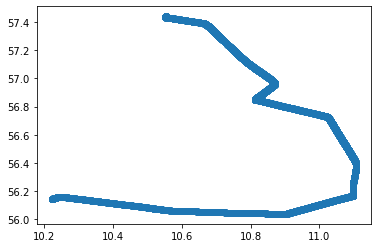

In [0]:
import matplotlib.pyplot as plt
y = list(df['Latitude'])
x = list(df['Longitude'])
fig = plt.figure()

plt.scatter(x, y)
plt.show()

In [0]:
current_lat , current_lon = df['Latitude'].loc[1000]+0.01, df['Longitude'].loc[1000]+0.01
current_lat, current_lon

(56.059888, 10.701157)

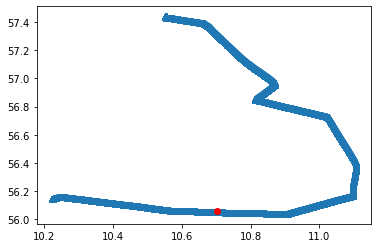

In [0]:
fig = plt.figure()
plt.plot( current_lon , current_lat,marker="o", color = 'r')
plt.scatter(x, y, marker='^')
plt.show()

In [0]:
from math import radians, sin, cos, acos
global counter
counter = 0
last = df.shape[0]

first = 0
#pos= [[c1], [c2]]
pos=[[999, 999],[999, 999]]
def calculate_distance(Lon1, Lat1, Lon2, Lat2):
    lon1 = radians(Lon1)
    lat1 = radians(Lat1)
    lon2 = radians(Lon2)
    lat2 = radians(Lat2)
    dist = 6371.0000 * acos(sin(lat1)*sin(lat2) + cos(lat1)*cos(lat2)*cos(lon1 - lon2))
    return dist
loc_x1 = 555
loc_x2 = 555

#pos= [[c1], [c2]]
pos=[[999, 999],[999, 999]]

counter = 0

def check_condition(x, y):
    global counter

    if pos[counter][0] == x and pos[counter][1] == y:
        return False
    else:
        pos[counter][0] = x
        pos[counter][1] = y
        if counter == 1:
            counter = 0
        else:
            counter=1
        return True
    
    #binary search it's efficient
while check_condition(loc_x1, loc_x2):
    # search for median
    mid = (int)((last + first) / 2)
    p_distance = calculate_distance(df['Longitude'].loc[0], df['Latitude'].loc[0], current_lon, current_lat)
    m_distance = calculate_distance(df['Longitude'].loc[0], df['Latitude'].loc[0], df['Longitude'].loc[mid], df['Latitude'].loc[mid])
    print("distance to point:", p_distance, "distance to median:", m_distance)
    if p_distance > m_distance:
        print("point - 1")
        first = mid
        loc_x1 = df['Longitude'].loc[mid]
        loc_x2 = df['Latitude'].loc[mid]
    elif p_distance < m_distance:
        print("point - 2")
        last = mid
        loc_x1 = df['Longitude'].loc[mid]
        loc_x2 = df['Latitude'].loc[mid]
        
print("nearest point:", loc_x1, loc_x2)
print("index:", mid)

distance to point: 31.201775022326913 distance to median: 75.38189099258177
point - 2
distance to point: 31.201775022326913 distance to median: 48.4565381008451
point - 2
distance to point: 31.201775022326913 distance to median: 22.42011329560793
point - 1
distance to point: 31.201775022326913 distance to median: 38.10875315423173
point - 2
distance to point: 31.201775022326913 distance to median: 29.694713292108336
point - 1
distance to point: 31.201775022326913 distance to median: 33.91524183189642
point - 2
distance to point: 31.201775022326913 distance to median: 31.734713955280295
point - 2
distance to point: 31.201775022326913 distance to median: 30.644986131759346
point - 1
distance to point: 31.201775022326913 distance to median: 31.167644048933056
point - 1
distance to point: 31.201775022326913 distance to median: 31.452596858639378
point - 2
distance to point: 31.201775022326913 distance to median: 31.309570772411597
point - 2
distance to point: 31.201775022326913 distance to

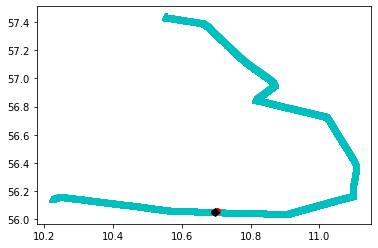

In [0]:
fig = plt.figure()
plt.plot( current_lon , current_lat,marker="o", color = 'r')
plt.plot(df['Longitude'].loc[mid], df['Latitude'].loc[mid],  marker="h", color="k")
plt.plot(df['Longitude'].loc[mid+1],df['Latitude'].loc[mid+1],  marker="D", color="k")
plt.scatter(x, y, marker='^', color="c")
plt.show()

In [0]:
current_lat, current_lon

(56.059888, 10.701157)

In [0]:
  df['Longitude'].loc[mid], df['Latitude'].loc[mid]

(10.694238, 56.049618)

In [0]:
#add here the buffer code to cope up with inaccuracies calculate_distance( df['Longitude'].loc[mid], df['Latitude'].loc[mid], current_lon, current_lat)
distance2 = calculate_distance(df['Longitude'].loc[mid+1], df['Latitude'].loc[mid+1], current_lon, current_lat)
distance1 = calculate_distance(df['Longitude'].loc[mid], df['Latitude'].loc[mid], current_lon, current_lat)

incr = 0
while distance1 > distance2:
  
  print("d1:", distance1*1000000, "d2:", distance2*1000000)
  distance1 = calculate_distance( df['Longitude'].loc[mid+incr], df['Latitude'].loc[mid+incr], current_lon, current_lat)
  distance2 = calculate_distance( df['Longitude'].loc[mid+1+incr], df['Latitude'].loc[mid+1+incr], current_lon, current_lat)
  distance1 = distance1*1000000
  distance2 = distance2*1000000
  incr += 1

print(incr, mid)
df['Longitude'].loc[mid+incr], df['Latitude'].loc[mid+incr]

d1: 1220108.2998939634 d2: 1211029.068419788
d1: 1220108299893.9634 d2: 1211029068419.788
d1: 1211029068419.788 d2: 1203563949746.613
d1: 1203563949746.613 d2: 1198741543312.1548
d1: 1198741543312.1548 d2: 1195907999019.4954
d1: 1195907999019.4954 d2: 1195606788284.1716
6 1004


(10.698852, 56.049203000000006)

In [0]:
calculate_distance( df['Longitude'].loc[mid], df['Latitude'].loc[mid], current_lon, current_lat)*1000000

1220108.2998939634

In [0]:
calculate_distance( df['Longitude'].loc[mid+incr], df['Latitude'].loc[mid+incr], current_lon, current_lat)*1000000

1196706.967109675

In [0]:
#choose point mid+incr-1 for the nearest point as the incr variable increments as we jump out of the loop
calculate_distance( df['Longitude'].loc[mid+incr-1], df['Latitude'].loc[mid+incr-1], current_lon, current_lat)*1000000

1195606.7882841716

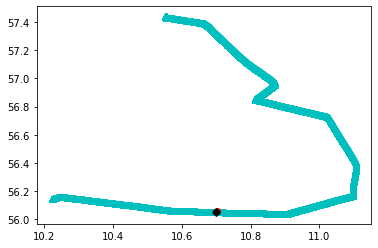

In [0]:
fig = plt.figure()
plt.plot( current_lon , current_lat,marker="o", color = 'r')
plt.plot(df['Longitude'].loc[mid+incr-1], df['Latitude'].loc[mid+incr-1],  marker="h", color="k")
plt.plot(df['Longitude'].loc[mid+incr-1],df['Latitude'].loc[mid+incr-1],  marker="D", color="k")
plt.scatter(x, y, marker='^', color="c")
plt.show()

In [0]:
from math import radians, sin, cos, acos

def calculate_distance1(Lon1, Lat1, Lon2, Lat2):
    
    lon1 = radians(Lon1)
    lat1 = radians(Lat1)
    
    lon2 = radians(Lon2)
    lat2 = radians(Lat2)
   
    dist = 6371.01 * acos(sin(lat1)*sin(lat2) + cos(lat1)*cos(lat2)*cos(lon1 - lon2))
    
    return dist

total_distance =0.0
print(x[44], y[44])
for i in range(0, len(x)-1):
    if x[i] != x[i+1] and y[i] != y[i+1]:
      #they both cant be same if they are same then it will show error while calculating the distance
      total_distance += calculate_distance1(x[i], y[i], x[i+1], y[i+1])

print()
distance_travelled = 0.0
for i in range(0, mid):
    if x[i] != x[i+1] and y[i] != y[i+1]:
      distance_travelled += calculate_distance1(x[i], y[i], x[i+1], y[i+1])
print(distance_travelled, total_distance)
print((distance_travelled/total_distance)*100, "%")

10.221793 56.144955

33.330718222399256 221.96255209120224
15.01637006259686 %


In [0]:
df.head()

,_id,Timestamp,Type_of_mobile,MMSI,Latitude,Longitude,Navigational_status,ROT,COG,Heading,IMO,Callsign,Name,Ship_type,Cargo_type,Width,Length,Type_of_position_fixing_device,Draught,Destination,ETA,Data_source_type,Size_A,Size_B,Size_C,Size_D
0,ObjectId(5e8c49d16ba65308bf48a86e),2018-11-06T13:38:02.000Z,Class A,209336000,56.145188,10.221828,Under way using engine,0.0,331.7,216,9128403,5BAZ5,RIX ALLIANCE,Cargo,No additional information,11.0,88.0,GPS,3.2,FREDERIKSHAVN DK,07/11/2018 20:00:00,AIS,75.0,13.0,5.0,6.0
1,ObjectId(5e8c49d16ba65308bf48aad5),2018-11-06T13:38:06.000Z,Class A,209336000,56.145113,10.221905,Under way using engine,0.0,332.3,216,9128403,5BAZ5,RIX ALLIANCE,Cargo,No additional information,11.0,88.0,GPS,3.2,FREDERIKSHAVN DK,07/11/2018 20:00:00,AIS,75.0,13.0,5.0,6.0
2,ObjectId(5e8c49d16ba65308bf48b0a2),2018-11-06T13:38:16.000Z,Class A,209336000,56.145057,10.221943,Under way using engine,0.0,334.0,216,9128403,5BAZ5,RIX ALLIANCE,Cargo,No additional information,11.0,88.0,GPS,3.2,FREDERIKSHAVN DK,07/11/2018 20:00:00,AIS,75.0,13.0,5.0,6.0
3,ObjectId(5e8c49d16ba65308bf48b71a),2018-11-06T13:38:27.000Z,Class A,209336000,56.145035,10.221960,Under way using engine,0.0,335.0,216,9128403,5BAZ5,RIX ALLIANCE,Cargo,No additional information,11.0,88.0,GPS,3.2,FREDERIKSHAVN DK,07/11/2018 20:00:00,AIS,75.0,13.0,5.0,6.0
4,ObjectId(5e8c49d16ba65308bf48bcc2),2018-11-06T13:38:37.000Z,Class A,209336000,56.145028,10.221973,Under way using engine,0.0,335.0,216,9128403,5BAZ5,RIX ALLIANCE,Cargo,No additional information,11.0,88.0,GPS,3.2,FREDERIKSHAVN DK,07/11/2018 20:00:00,AIS,75.0,13.0,5.0,6.0
